# Domains

This notebook looks quickly at the top domains in our URL dataset. Remember this includes URLs that were filtered out in the URLS notebook (URLs for HTML, that had a 200 OK, and are correlated with the User-Agent that requested them.

In [1]:
import sys

sys.path.append('../utils')
from warc_spark import init

sc, sqlc = init()
urls = sqlc.read.csv('results/urls', header=True)

In [7]:
import tldextract

def tld_bot(r):
    d = tldextract.extract(r.url).registered_domain
    y = r.date[0:4]
    return (d, y, r.bot)

domains = urls.rdd.map(tld_bot)
domains = domains.toDF(['domain', 'year', 'bot'])
domains.show(5)
domains.persist()

+-------------+----+-----+
|       domain|year|  bot|
+-------------+----+-----+
| zoominfo.com|2017| true|
|jeuxvideo.com|2017|false|
| zoominfo.com|2017| true|
| zoominfo.com|2017| true|
| zoominfo.com|2017| true|
+-------------+----+-----+
only showing top 5 rows



DataFrame[domain: string, year: string, bot: string]

In [12]:
from pyspark.sql.functions import desc

domain_counts = domains.groupBy(domains.domain).count().sort(desc('count'))
domain_counts.show(5)

+------------+-------+
|      domain|  count|
+------------+-------+
|zoominfo.com|4051786|
| youtube.com| 514881|
|     kit.edu| 154754|
| twitter.com| 111586|
| bbspink.com|  90063|
+------------+-------+
only showing top 5 rows



In [15]:
domain_counts.show(50)

+--------------------+-------+
|              domain|  count|
+--------------------+-------+
|        zoominfo.com|4051786|
|         youtube.com| 514881|
|             kit.edu| 154754|
|         twitter.com| 111586|
|         bbspink.com|  90063|
|        ccluster.com|  79984|
|           alexa.com|  77544|
|             8ch.net|  68715|
|          reddit.com|  45221|
|theduckwebcomics.com|  43298|
|           ameblo.jp|  38067|
|        facebook.com|  36143|
|        ancestry.com|  30437|
|     geograph.org.uk|  29621|
|          google.com|  27525|
|        clphs.edu.my|  22931|
| turnvereinsursee.ch|  21480|
|        tumblenet.ga|  19915|
|     doubleclick.net|  18317|
|         teamaol.com|  18215|
|phoenixurbanspace...|  18058|
|     socialblade.com|  17304|
|              2ch.sc|  16993|
|          statics.gq|  16391|
|              svt.se|  15829|
|        imagebam.com|  15264|
|         homes.co.jp|  14739|
|          tumblr.com|  14285|
|        tvtropes.org|  14279|
|       

Filter by bots/human:

In [1]:
domains.createOrReplaceTempView('domains')
sql = """
      SELECT domain, count(domain) AS domain_count
      FROM domains
      WHERE bot = "true" AND year = "2018"
      GROUP BY domain
      ORDER BY domain_count DESC
      """
bots = sqlc.sql(sql)
bots.show(50)

NameError: name 'domains' is not defined

In [30]:
domains.createOrReplaceTempView('domains')
sql = """
      SELECT 
        domain, 
        count(domain) AS domain_count
      FROM domains
      WHERE bot = "false" 
        AND year = "2018"
      GROUP BY domain
      ORDER BY domain_count DESC
      """
browsers = sqlc.sql(sql)
browsers.show(50)

+--------------------+------------+
|              domain|domain_count|
+--------------------+------------+
|          google.com|       17602|
|         bbspink.com|       17253|
|         youtube.com|       11644|
|     holdtheline.com|        9710|
|         twitter.com|        9363|
|        facebook.com|        7871|
|         livedoor.jp|        6474|
|         writing.com|        6330|
|      aaaclipart.com|        6053|
|            wykop.pl|        5958|
|          abelhas.pt|        5924|
|   stackoverflow.com|        4912|
|             8ch.net|        4657|
|          reddit.com|        4304|
|        durasite.net|        4190|
|            suumo.jp|        4055|
|       crypterium.io|        3801|
|       wikipedia.org|        3490|
|          tumblr.com|        3384|
|   stackexchange.com|        3334|
|           ameblo.jp|        2995|
|  gina-rodriguez.net|        2855|
|        wdgaming.net|        2837|
|           exblog.jp|        2596|
|         mozilla.org|      

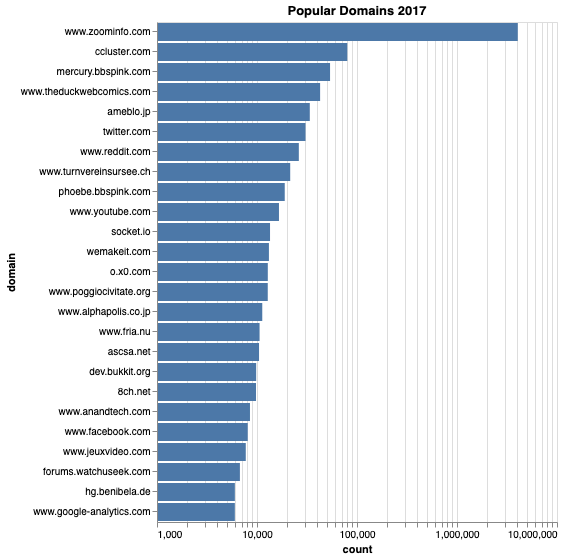

In [34]:
import pandas
import altair
altair.renderers.enable('notebook')

d2017 = pandas.read_csv('results/2017-10-25/domains.csv')
x = d2017.sort_values(by=['count'], ascending=False)[0:25]

chart = altair.Chart(x).mark_bar().encode(
    altair.Y("domain:N", sort=altair.EncodingSortField(field="count", op="count", order='ascending')),
    altair.X("count:Q", scale=altair.Scale(type='log', base=10))
)

chart = chart.properties(title="Popular Domains 2017")

chart.display()

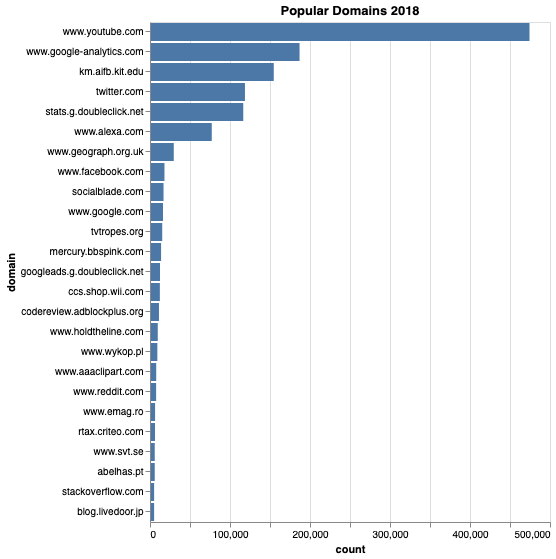

In [11]:
d2018 = pandas.read_csv('results/2018-10-25/domains.csv')
top_25 = d2018.sort_values(by=['count'], ascending=False)[0:25]

chart = altair.Chart(top_25).mark_bar().encode(
    altair.Y("domain:N", sort=altair.EncodingSortField(field="count", op="count", order='ascending')),
    altair.X("count:Q", scale=altair.Scale(type='log', base=10))
)

chart = chart.properties(title="Popular Domains 2018")

chart.display()

In [35]:
## Chan Messageboards

import re

count = 0
y2017 = pandas.read_csv('results/2017-10-25/domains.csv')
for i, row in y2017.iterrows():
    if re.search(r'(ccluster.com|bbspink.com|8ch.net)', row.domain):
        count += row['count']
print(count)

162799
